In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import kneighbors_graph
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pcos-diagnosis-dataset/pcos_dataset.csv


In [162]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("samikshadalvi/pcos-diagnosis-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pcos-diagnosis-dataset


In [163]:
df = pd.read_csv("/kaggle/input/pcos-diagnosis-dataset/pcos_dataset.csv")

In [164]:
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [165]:
df.index = np.arange(1, len(df)+1)
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
1,24,34.7,1,25.2,20,0
2,37,26.4,0,57.1,25,0
3,32,23.6,0,92.7,28,0
4,28,28.8,0,63.1,26,0
5,25,22.1,1,59.8,8,0


In [166]:
df.shape

(1000, 6)

In [167]:
df.isna().sum(axis=0)

Age                          0
BMI                          0
Menstrual_Irregularity       0
Testosterone_Level(ng/dL)    0
Antral_Follicle_Count        0
PCOS_Diagnosis               0
dtype: int64

In [168]:
df.dtypes

Age                            int64
BMI                          float64
Menstrual_Irregularity         int64
Testosterone_Level(ng/dL)    float64
Antral_Follicle_Count          int64
PCOS_Diagnosis                 int64
dtype: object

In [169]:
df.corr()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
Age,1.000000,-0.049455,0.032300,-0.050129,0.017841,-0.064675
BMI,-0.049455,1.000000,0.031189,0.003811,0.030724,0.377852
Menstrual_Irregularity,0.032300,0.031189,1.000000,0.042694,0.035851,0.469376
Testosterone_Level(ng/dL),-0.050129,0.003811,0.042694,1.000000,0.011976,0.200817
Antral_Follicle_Count,0.017841,0.030724,0.035851,0.011976,1.000000,0.192014
PCOS_Diagnosis,-0.064675,0.377852,0.469376,0.200817,0.192014,1.000000


In [170]:
X = df[["Age", "BMI", "Menstrual_Irregularity", "Testosterone_Level(ng/dL)", "Antral_Follicle_Count"]]
y = df["PCOS_Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [171]:
scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[0.59259259, 0.21301775, 1.        , 0.59899749, 0.29166667],
       [0.59259259, 0.9704142 , 0.        , 0.26566416, 0.83333333],
       [0.66666667, 0.21893491, 1.        , 0.80075188, 0.95833333],
       [0.        , 0.68047337, 1.        , 0.71428571, 0.70833333],
       [0.81481481, 0.1183432 , 0.        , 0.34586466, 0.79166667],
       [0.62962963, 0.81656805, 1.        , 0.26942356, 0.625     ],
       [0.        , 0.50295858, 1.        , 0.27819549, 0.66666667],
       [0.85185185, 0.1183432 , 1.        , 0.49498747, 0.58333333],
       [0.62962963, 0.23076923, 0.        , 0.60275689, 0.45833333],
       [0.74074074, 0.34911243, 1.        , 0.19799499, 0.16666667],
       [0.7037037 , 0.68047337, 1.        , 0.60526316, 0.83333333],
       [0.81481481, 0.59171598, 0.        , 0.70426065, 0.91666667],
       [0.7037037 , 0.12426036, 0.        , 0.58145363, 0.20833333],
       [0.59259259, 0.79881657, 1.        , 0.90977444, 0.25      ],
       [0.92592593, 0.02366864, 0.

In [172]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
neigh.score(X_test, y_test, sample_weight=None)

0.795

In [173]:
# odd numbers, to prevent ties
param_grid = {"n_neighbors": range(1, 20, 2)}

knn = KNeighborsClassifier()

gscv = GridSearchCV(knn, param_grid, cv = 5)
gscv.fit(X_train, y_train)


print("Best params:", gscv.best_params_)
print("Best cross-validation score:", gscv.best_score_)


Best params: {'n_neighbors': 5}
Best cross-validation score: 0.82875


(0.0, 0.9)

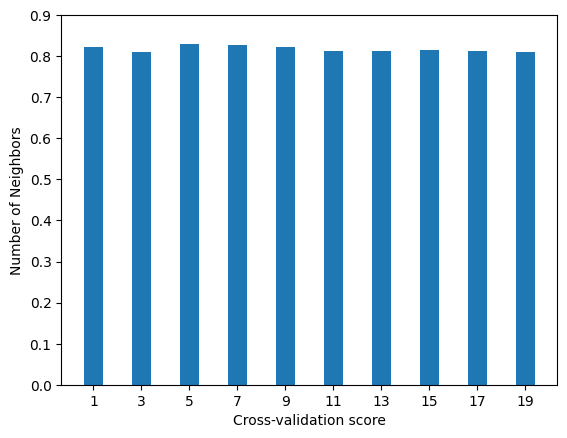

In [174]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar(param_grid["n_neighbors"], gscv.cv_results_["mean_test_score"])
ax.set_xticks(param_grid["n_neighbors"])
ax.set_ylabel("Number of Neighbors")
ax.set_xlabel("Cross-validation score")
ax.set_ylim((0, 0.90))